First install this [reddit picture scraper](https://github.com/impshum/Multithreaded-Reddit-Image-Downloader)


In [4]:
!pip3 install -r requirements.txt
!wget https://raw.githubusercontent.com/JohnnyUrosevic/Multithreaded-Reddit-Image-Downloader/master/run.py

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement tensorflow==1.14 (from -r requirements.txt (line 6)) (from versions: 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0)
ERROR: No matching distribution found for tensorflow==1.14 (from -r requirements.txt (line 6))
--2020-09-16 17:41:56--  https://raw.githubusercontent.com/JohnnyUrosevic/Multithreaded-Reddit-Image-Downloader/master/run.py
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.196.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.196.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2675 (2.6K) [text/plain]
Saving to: ‘run.py.1’

run.py.1            100%[===================>]   2.61K  --.-KB/s    in 0s      

2020-09-16 17:41:56 (5.17 MB/s) - ‘run.py.1’ saved [2675

Here we set the parameters for testing

In [36]:
image_count = 80
safe_paths = []
nsfw_paths = []

safe_subreddits = ["pics", "gaming"]
nsfw_subreddits = ["nsfw", "rule34"]

In [37]:
from run import redditImageScraper

def get_images(subreddit, nsfw):
    destination = nsfw_paths if nsfw else safe_paths
    destination.append(f"images/{subreddit}")
    
    scraper = redditImageScraper(subreddit, image_count, "hot", nsfw)
    scraper.start()

for sub in safe_subreddits:
    get_images(sub, False)
for sub in nsfw_subreddits:
    get_images(sub, True)

In [38]:
from nudenet import NudeClassifier
classifier = NudeClassifier()

In [55]:
import numpy as np

In [59]:
import os

preds = {}

def generate_confusion(threshold):
    confusion = np.zeros((2,2))
    
    def test(paths, nsfw, threshold):
        for path in paths:
            prob = classifier.classify([os.path.join(path,f) for f in os.listdir(path)])
            for k, p in prob.items():
                if p['unsafe'] >= threshold:
                    confusion[nsfw][1] += 1
                    preds[k] = (1, nsfw)
                else:
                    confusion[nsfw][0] += 1
                    preds[k] = (0, nsfw)
    
    test(safe_paths, 0, threshold)
    test(nsfw_paths, 1, threshold)
    return confusion

In [45]:
#print false positives
print([k for k, v in preds.items() if v == (1,0)])

['images/pics/fsep6r0xqln51.jpg']


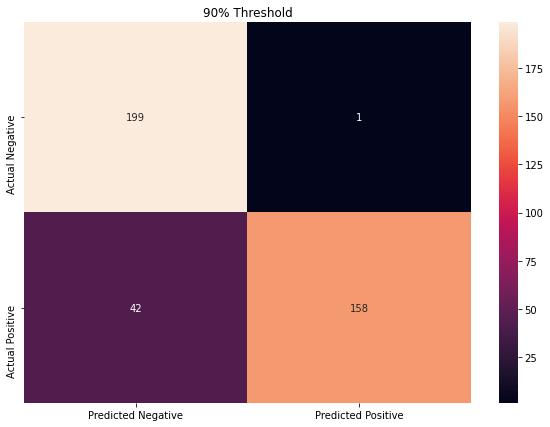

In [66]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plot(threshold):
    confusion = generate_confusion(threshold)
    df_cm = pd.DataFrame(confusion, index = ["Actual Negative", "Actual Positive"],
                      columns = ["Predicted Negative", "Predicted Positive"])
    plt.figure(figsize = (10,7))
    ax = plt.axes()
    sn.heatmap(df_cm, annot=True, ax=ax, fmt='g')
    ax.set_title(f'{int(threshold * 100)}% Threshold')

plot(.9)

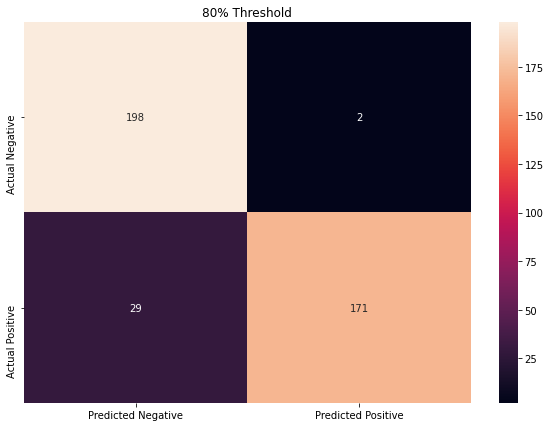

In [68]:
plot(.8)

In [64]:
print([k for k, v in preds.items() if v == (1,0)])

['images/pics/fsep6r0xqln51.jpg', 'images/gaming/vc3rnkc8okn51.jpg']


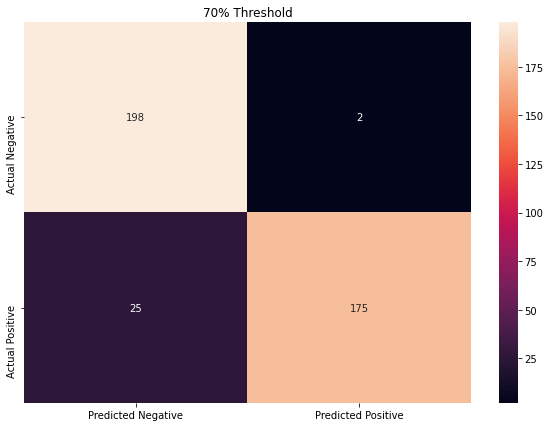

In [69]:
plot(.7)

In [70]:
print([k for k, v in preds.items() if v == (0,1)])

['images/nsfw/edkbr8jc6ln51.jpg', 'images/nsfw/4h2molx43jn51.jpg', 'images/nsfw/fauzt8tb3in51.jpg', 'images/nsfw/3HvNhTn.jpg', 'images/nsfw/qgmUjVJ.jpg', 'images/nsfw/X2xJENJ.jpg', 'images/rule34/s9mfbhp8ykn51.jpg', 'images/rule34/5s295sa1ejn51.jpg', 'images/rule34/xjgvk6x4kjn51.jpg', 'images/rule34/n1hdabonsjn51.jpg', 'images/rule34/mktkndp.jpg', 'images/rule34/oq7gao8vejn51.jpg', 'images/rule34/s36iv4c8phn51.jpg', 'images/rule34/AhFuTnA.png', 'images/rule34/up5o6R8.png', 'images/rule34/ica13d74min51.jpg', 'images/rule34/t4U4APF.jpg', 'images/rule34/a2zsB9D.jpg', 'images/rule34/l4jc3z03xgn51.jpg', 'images/rule34/4p7rohhlnjn51.jpg', 'images/rule34/o01s1rcqajn51.jpg', 'images/rule34/3oqydkwzljn51.jpg', 'images/rule34/wioofgmwxgn51.jpg', 'images/rule34/xksu1apoqin51.jpg', 'images/rule34/6opmhc1erin51.jpg']
